In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/Users/proust/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ads = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
ads.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
ads.shape

(200, 4)

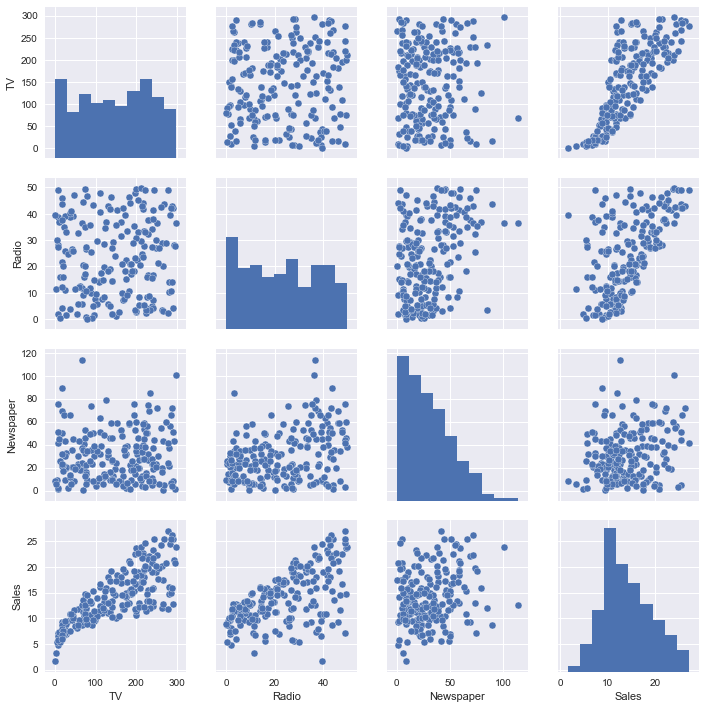

In [4]:
sns.pairplot(ads)

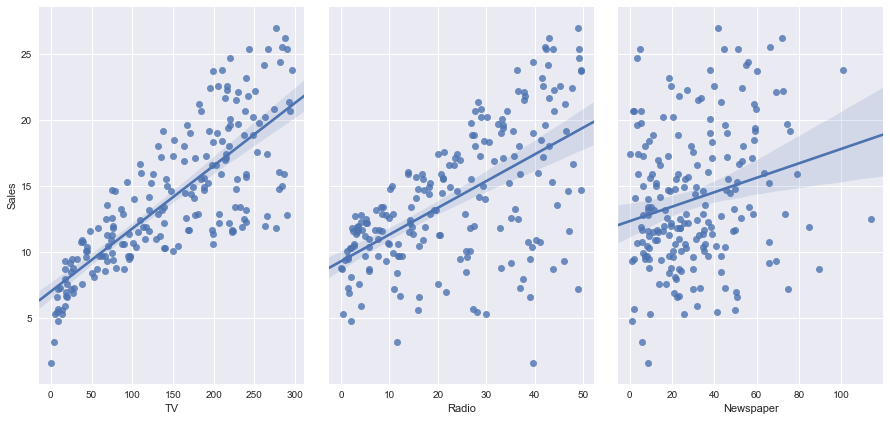

In [5]:
viz = sns.pairplot(ads, kind='reg', x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size=6,aspect=0.7)

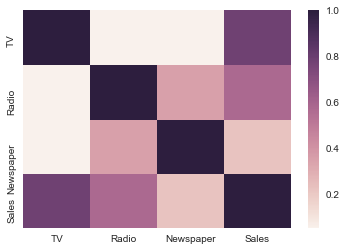

In [6]:
sns.heatmap(ads.corr())


In [7]:
lin = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=ads).fit()
print (lin.pvalues)

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64


In [8]:
#dropped newspaper after looking at pvalues
independent = ['TV', 'Radio']
X = ads[independent]
y = ads.Sales

lr = LinearRegression()
lr.fit(X, y)

print (lr.intercept_)
print (lr.coef_)
print (lr.score(X, y)) #RSQUARED

2.92109991241
[ 0.04575482  0.18799423]
0.897194261083
